# Screen Time Mental Health PCA

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('max_row',2000)
pd.set_option('max_column',300)

base_dir = os.path.join(os.getcwd(), os.pardir)

Get the data.

In [2]:
data_path = os.path.join(base_dir, "data/altered/maps_feature_mapping.csv")
df = pd.read_csv(data_path, index_col="X")
df

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
X,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.0,30.0,59.294132,181.602831,107.0,NaN,NaN,1.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
2,NaN,9.0,26.0,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,NaN,3.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,0.0,0.0,3.0,5.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.0,0.0
4,0.0,NaN,22.0,49.812426,160.224186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0
5,0.0,8.0,31.0,62.270030,191.703227,132.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,NaN,NaN,0.0,4.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,3.0,5.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN,2.0,1.0,1.0,NaN,3.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13730,NaN,13.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,0.0,0.0
13731,0.0,6.0,29.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,NaN,9.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,1.0,0.0
13732,NaN,21.0,37.0,58.075832,169.235565,108.0,NaN,NaN,1.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,2.0,2.0,4.0,4.0,0.0,4.0,0.0,NaN,0.0,3.0,1.0,2.0,1.0,4.0,0.0,1.0,2.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,

## Data normalisation

Before reducing the dimensionality of the data there are some pre-processing steps we must apply to get accurate results.

### Scaling

To get good results with dimensionality reduction methods it is a good idea to scale the data. 

We shall use sklearn's `StandardScaler` for this.

In [18]:
scaler = StandardScaler()
data_df = pd.DataFrame(scaler.fit_transform(df).copy(), columns=data_df.columns)
data_df

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,NaN,-0.523861,0.408479,-0.202154,1.443514,0.199495,NaN,NaN,0.599420,-0.637151,-0.192787,-0.140431,-0.661663,0.236214,1.601333,-0.117132,-0.974911,0.692829,-0.116664,1.342300,0.502785,-0.753030,-1.605734,-0.572776,-0.104684,-0.054944,-0.654373,0.281803,1.603309,-0.146520,-1.111006,0.476825,0.103825,1.750727,0.845443,-0.754659,0.510181,0.457762,0.397848,-0.154326,-0.566239,-0.512806,-0.476246,0.527057,-0.313109,-0.162861,-0.507756,0.137917,-1.071604,0.097662,0.339816,-0.834953,0.157007,0.525695,0.621346,0.826432,-1.096426,-1.026358,0.393752,0.541686,1.147489,-0.47328,NaN,NaN,NaN,NaN,NaN,-0.307125,-0.275787,-0.406744,-0.134671,NaN,-0.471568,0.0,0.0,1.026721,-1.046201,-0.336944,-1.254027,1.093504,-0.966344,-0.122178
1,NaN,0.777183,-0.417622,NaN,NaN,-1.119359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.474608,-0.313109,-0.162861,-0.507756,NaN,NaN,NaN,NaN,0.155463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.966344,8.184748
2,NaN,-0.523861,-0.830673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.975441,-0.313109,-0.162861,-0.507756,0.137917,1.423348,-0.650641,-0.465783,0.155463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.336944,0.996148,-1.350552,1.034828,-0.122178
3,-0.544077,NaN,-1.243724,-0.992123,-1.062106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137917,-1.903254,-0.650641,0.339816,-0.834953,NaN,NaN,-0.671693,NaN,NaN,NaN,-1.035623,NaN,NaN,NaN,NaN,NaN,NaN,-1.030657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.046201,NaN,NaN,NaN,1.034828,-0.122178
4,-0.544077,0.560342,0.615004,0.045783,2.627300,1.698192,0.0,NaN,-1.668278,-1.733648,-1.735725,-1.351740,-0.661663,1.471992,0.270423,1.185827,-0.974911,-1.443357,1.164264,-1.259144,-1.988921,-0.753030,-1.605734,-1.694566,-1.691066,-0.054944,-0.654373,1.610455,0.207238,-0.146520,-1.111006,0.476825,0.103825,-1.090268,-1.182812,-0.754659,NaN,NaN,-2.513523,-0.154326,-0.566239,-0.512806,-0.476246,-0.474608,3.193775,-0.162861,-0.507756,0.137917,1.423348,0.097662,0.339816,0.155463,-0.961246,-0.671911,-0.671693,NaN,0.339215,-1.026358,-1.035623,NaN,0.166042,-0.47328,-1.770275,-1.679538,-1.03672,0.970255,1.038118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.026721,-1.046201,-0.336944,0.996148,1.093504,-0.966344,-0.122178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,NaN,1.644545,-0.211097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### NaN handling

As seen in the `missing_values_handling` notebook, the dataset has a lot of NaN values. This must be resolved before applying dimensionality reduction techniques.

Let's replace the NaN values with `-1`.

In [19]:
for c in data_df:
    data_df[c] = data_df[c].fillna(-1)
data_df

,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,talk_phon_wend,text_wend,talk_mob_wend,comp_wend,musi_wend,read_wend,work_wend,alon_wend,draw_wend,play_wend,tv_wend,out_win_wend,out_sum_wend,tran_wend,talk_phon_week,text_week,talk_mob_week,comp_week,musi_week,read_week,work_week,alon_week,draw_week,play_week,tv_week,out_win_week,out_sum_week,tran_week,pat_pres_10,pat_pres_8,pat_pres,num_home,mat_anx_1,mat_anx_18m,mat_anx_8m,agg_score,emot_cruel,phys_cruel,mat_anx_0m,pat_ses,mat_ses,pat_edu,mat_edu,parity,dep_band_15,dep_band_13,dep_band_10,dep_band_07,anx_band_15,anx_band_13,anx_band_10,anx_band_07,exercise,child_bull,phone_14_wend,phone_14_week,musi_13,tv_bed_9,own_mob,has_dep_diag,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,-1.000000,-0.523861,0.408479,-0.202154,1.443514,0.199495,-1.0,-1.0,0.599420,-0.637151,-0.192787,-0.140431,-0.661663,0.236214,1.601333,-0.117132,-0.974911,0.692829,-0.116664,1.342300,0.502785,-0.753030,-1.605734,-0.572776,-0.104684,-0.054944,-0.654373,0.281803,1.603309,-0.146520,-1.111006,0.476825,0.103825,1.750727,0.845443,-0.754659,0.510181,0.457762,0.397848,-0.154326,-0.566239,-0.512806,-0.476246,0.527057,-0.313109,-0.162861,-0.507756,0.137917,-1.071604,0.097662,0.339816,-0.834953,0.157007,0.525695,0.621346,0.826432,-1.096426,-1.026358,0.393752,0.541686,1.147489,-0.47328,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-0.307125,-0.275787,-0.406744,-0.134671,-1.0,-0.471568,0.0,0.0,1.026721,-1.046201,-0.336944,-1.254027,1.093504,-0.966344,-0.122178
1,-1.000000,0.777183,-0.417622,-1.000000,-1.000000,-1.119359,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.474608,-0.313109,-0.162861,-0.507756,-1.000000,-1.000000,-1.000000,-1.000000,0.155463,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.966344,8.184748
2,-1.000000,-0.523861,-0.830673,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.975441,-0.313109,-0.162861,-0.507756,0.137917,1.423348,-0.650641,-0.465783,0.155463,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-0.336944,0.996148,-1.350552,1.034828,-0.122178
3,-0.544077,-1.000000,-1.243724,-0.992123,-1.062106,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.457762,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137917,-1.903254,-0.650641,0.339816,-0.834953,-1.000000,-1.000000,-0.671693,-1.000000,-1.000000,-1.000000,-1.035623,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.030657,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.046201,-1.000000,-1.000000,-1.000000,1.034828,-

## PCA

We can use PCA to reduce the dimensionality of the data.

In [20]:
def meanX(dataX):
    return np.mean(dataX,axis=0) 

def pca_method(XMat, k):
    average = meanX(XMat)
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   
    featValue, featVec=  np.linalg.eig(covX)  
    index = np.argsort(-featValue) 
    finalData = []
    if k > n:
        print ("k must lower than feature number")
        return
    else:
        selectVec = np.matrix(featVec.T[index[:k]]) 
        finalData = data_adjust * selectVec.T
    return finalData

In [21]:
train_data=np.array(data_df)
pca_mat=pca_method(train_data,50)
print(np.shape(pca_mat))
print(pca_mat)

(13734, 50)
[[ 4.43986321e+00  5.28124625e-01  1.29313357e+00 ... -8.52663698e-01
   4.30471596e-02  1.10706634e+00]
 [-3.35924380e+00  1.53581594e+00 -3.61022232e-01 ... -3.16374003e-01
   5.55794047e-02 -9.83135717e-02]
 [-3.22449417e+00  1.60332789e+00 -6.85697387e-01 ... -1.52802900e-03
  -9.48512491e-02 -3.00647334e-02]
 ...
 [ 6.27691488e+00 -2.18851383e-01 -2.37523305e+00 ...  4.29972141e-01
  -4.99942322e-01 -3.44024626e-01]
 [ 3.02298625e+00 -3.65811158e+00 -2.19668242e+00 ...  1.63249145e-01
   3.63644325e-01 -1.65809904e-01]
 [-3.88244194e-01 -9.42238455e-01  1.20406134e+00 ... -9.67336597e-02
   4.47527528e-01 -1.72957636e-01]]


## PCA with Sklearn

Scikit-learn has an optimised PCA method we can use. This implementation keeps track of many variables useful for later analysis.

Let's first apply PCA with 50 components.

In [31]:
n_components = 50
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data_df)
explained_var = pca.explained_variance_ratio_.sum()
print(f"{n_components} (PCA) components are able to explain {100*explained_var:.2f}% of the variance in the data.")

50 (PCA) components are able to explain 90.79% of the variance in the data.


### Percentage based PCA

Rather than apply PCA based on the number of components, we can give a percentage target for the variance explained in the dataset.

If we give `n_components=0.95` sklearn will apply PCA with the number of components which is able to explain 95% of the variance in the dataset.

In [28]:
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(data_df)
n_components = reduced_data.shape[1]
print(f"95% of the variance in the dataset can be explained by {n_components} (PCA) components.")

95% of the variance in the dataset can be explained by 58 (PCA) components.


### Plotting variance explained by increasing components

Evidentily increasing the number of PCA components in the dimensionality reduction increases the amount of variance which can be explained.

We shall fit a PCA to the data using an increasing number of components and keep track of the total explained variance so we can plot how it changes with increasing components.

In [46]:
components = list(range(1,83))
pca_results = []

for c in components:
    pca = PCA(n_components=c)
    pca.fit_transform(data_df)
    explained_var = pca.explained_variance_ratio_.sum()
    pca_results.append((c, explained_var))

Now we can plot above results.

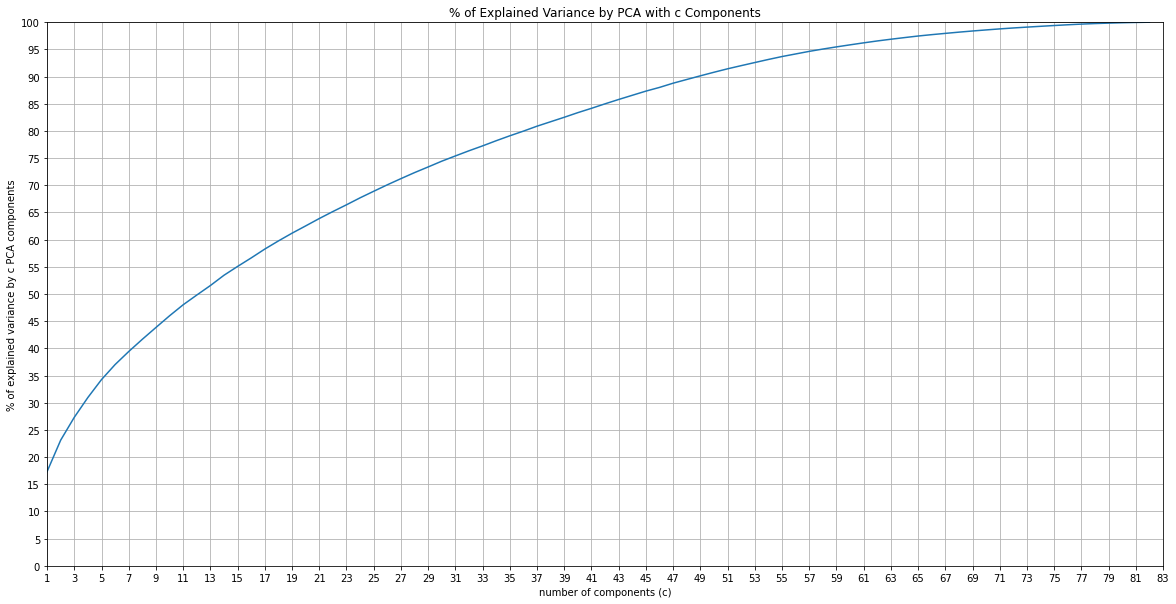

In [66]:
pca_results_arr = np.asarray(pca_results)
pca_results_arr[:,1] = pca_results_arr[:,1] * 100

figsave_dir = os.path.join(base_dir, "figures/pca_increasing_components.png")

fig, ax = plt.subplots(figsize=(20,10))
plt.title("% of Explained Variance by PCA with c Components")
ax.grid()
ax.set_xlabel("number of components (c)")
ax.set_ylabel("% of explained variance by c PCA components")
ax.set_xticks(np.arange(1, 84, 2))
ax.set_yticks(np.arange(0, 101, 5))
ax.set_xlim(xmin=1, xmax=83)
ax.set_ylim(ymin=0, ymax=100)
ax.plot(pca_results_arr[:, 0], pca_results_arr[:, 1])
plt.savefig(figsave_dir, bbox_inches="tight", facecolor="white")